# __K-means Clustering__
---

## __1. K-means clustering 진행하기__

### __Module import__

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

### __데이터 준비__

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,0.276181,-2.217047
1,7.927368,-9.761527
2,8.491428,-2.549749
3,-11.537102,2.434883
4,4.292259,-8.992204


### __데이터 시각화__

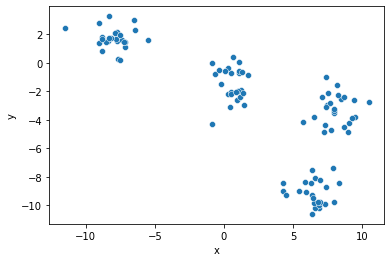

In [ ]:
sns.scatterplot(x="x", y="y", data=points, palette="Set2");

### __Initalize : Centorid__

In [ ]:
centroids = points.sample(4)
centroids

,x,y
26,5.456445,-8.999001
94,-7.559987,1.952901
99,1.432822,-3.001946
70,-9.048218,2.792694


1. 임의의 Centroid를 구하고, 샘플들과 임의의 Centroid들의 유클리드 거리를 구함.
2. K개의 각 거리별로 K개의 클러스터 군집 생성

In [ ]:
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,0.276181,-2.217047,2
1,7.927368,-9.761527,0
2,8.491428,-2.549749,2
3,-11.537102,2.434883,3
4,4.292259,-8.992204,0


이를 시각화 해보면 다음과 같음.

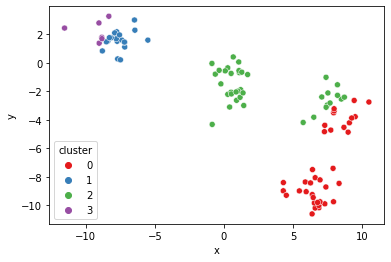

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

### __클러스터 별로 거리의 중심점(Centroid)을 평균값으로 계산__

In [ ]:
centroids_2 = result.groupby("cluster").mean()
centroids_2

,x,y
cluster,,
0,7.201901,-7.356288
1,-7.552568,1.561452
2,2.838080,-1.842430
3,-9.270299,2.223625


In [ ]:
# Centorid_2를 사용(평균 값이 적용된 Centroid)
distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,0.276181,-2.217047,2
1,7.927368,-9.761527,0
2,8.491428,-2.549749,0
3,-11.537102,2.434883,3
4,4.292259,-8.992204,0


이를 시각화 했을 경우, 두 가지 경우가 발생   
1. Centroid가 잘 적용되어 클러스터가 잘 된 경우
2. Centroid가 제대로 적용되지 않아 클러스터가 잘못된 경우

>__2번의 경우 최초 데이터에서 샘플링 하여 임의의 Centroid를 설정하는 부분부터 다시 실행__

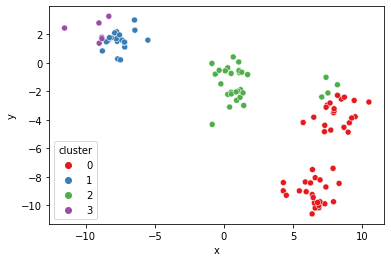

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

### __최적 Centroid가 적용된 클러스터를 위한 반복 작업__

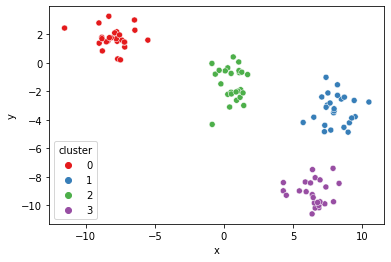

In [ ]:
centroids = points.sample(4)

distance = sp.spatial.distance.cdist(points, centroids, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)

centroids_2 = result.groupby("cluster").mean()

distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)

sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

<br /><br /><br />
## __2. Scikit-Learn을 통한 K-means clustering 진행하기__
---

### __Module import__

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### __데이터 준비__

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,0.276181,-2.217047
1,7.927368,-9.761527
2,8.491428,-2.549749
3,-11.537102,2.434883
4,4.292259,-8.992204


### __Scikit-Learn KMeans()__

In [ ]:
model = KMeans(n_clusters = 4, random_state = 0)
model.fit(points)

KMeans(n_clusters=4, random_state=0)

In [ ]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = model.labels_
result_by_sklearn.head()

,x,y,cluster
0,0.276181,-2.217047,2
1,7.927368,-9.761527,1
2,8.491428,-2.549749,3
3,-11.537102,2.434883,0
4,4.292259,-8.992204,1


### __데이터 시각화__

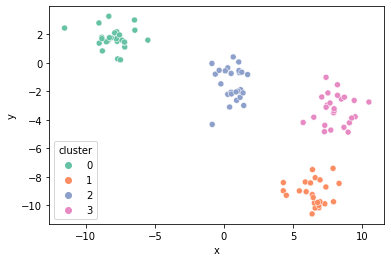

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");

### __최적의 클러스터 개수 찾기(Elbow)__

C:\Users\fatal\anaconda3\envs\ailab\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


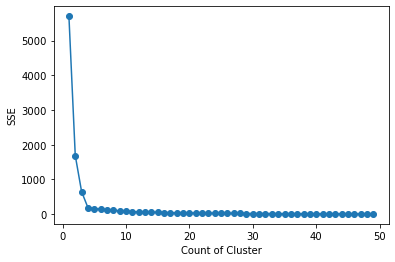

In [ ]:
def elbow(data, max_cluster):
    sse = []
    for i in range(1, max_cluster):
        km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
        km.fit(data)
        sse.append(km.inertia_)
        pass
    plt.plot(range(1, max_cluster), sse, marker='o')
    plt.xlabel('Count of Cluster')
    plt.ylabel('SSE')
    plt.show()
    pass
elbow(points, 50)

### __Moons 데이터 K-Means Clustering__

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
x, y = make_moons(n_samples=100, random_state=0)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,-0.096023,0.995379
1,1.672301,-0.240278
2,0.991790,0.127877
3,0.050944,0.184892
4,1.032052,-0.499486


In [ ]:
model = KMeans(n_clusters = 2, init='k-means++')
model.fit(points)

KMeans(n_clusters=2)

C:\Users\fatal\anaconda3\envs\ailab\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


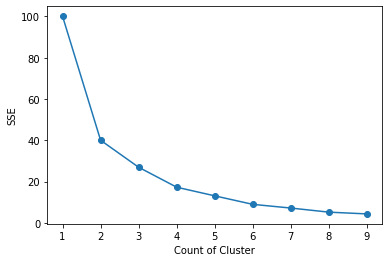

In [ ]:
elbow(points, 10)

In [ ]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = model.labels_
result_by_sklearn.head()

,x,y,cluster
0,-0.096023,0.995379,1
1,1.672301,-0.240278,0
2,0.991790,0.127877,0
3,0.050944,0.184892,1
4,1.032052,-0.499486,0


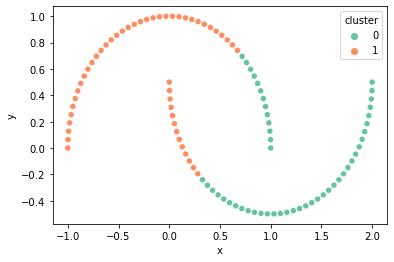

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");